In [23]:
import pandas as pd
import numpy as np

import path
from path import Path

import matplotlib.pyplot as plt

## Load Training Data and Class Labels

In [3]:
dir_root = Path.cwd().parent.parent
dir_root

Path('/Users/AnanyaPal1/Documents/TUD/5th semester/monte carlo simulations/bayesian-anomaly-and-fault-detection-in-sensor-data')

In [4]:
dir_train = dir_root / "data" / "train" / "X_train.txt"
dir_train_labels = dir_root / "data" / "train" / "y_train_mapped.txt"

In [9]:
X_train = pd.read_csv(dir_train,
                       header=None,
                       sep='\\s+',
                       index_col=None)
y_train = pd.read_csv(dir_train_labels,
                           header=None,
                           index_col=None)

In [10]:
X_train.shape

(7352, 561)

In [11]:
y_train.shape

(7352, 1)

## Check if classes are balanced.

Text(0.5, 1.0, 'Class label distribution')

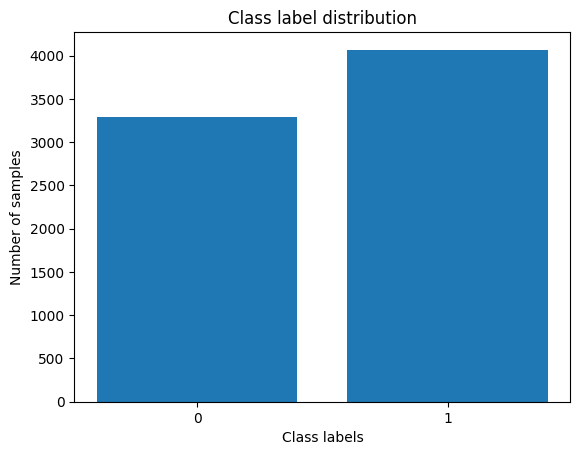

In [37]:
unique, counts = np.unique(y_train, return_counts=True)

plt.figure()
plt.bar(unique, counts)
plt.xticks([0,1])
plt.xlabel("Class labels")
plt.ylabel("Number of samples")
plt.title("Class label distribution")

## Check if Gaussian Naïve Bayes can be applied to the data

- G.N.B works best when:
    - feature distributions are roughly unimodal per class.
    - independence assumption is not roughly violated.

Goal: Plot a histogram per feature per class and normality plots. 

In [21]:
merged_df = X_train.copy()

merged_df[" "] = y_train.values.ravel()
display(merged_df.iloc[:, -1].head())
display(len(merged_df.iloc[:, -1]))

0    1
1    1
2    1
3    1
4    1
Name:  , dtype: int64

7352

#### Instead of plotting all features (human intepretation impossible since total features are 561), we choose a random selection of features to model.

In [28]:
np.random.seed(0)
features_to_plot = np.random.choice(X_train.columns,
                                    size=5,
                                    replace=False)

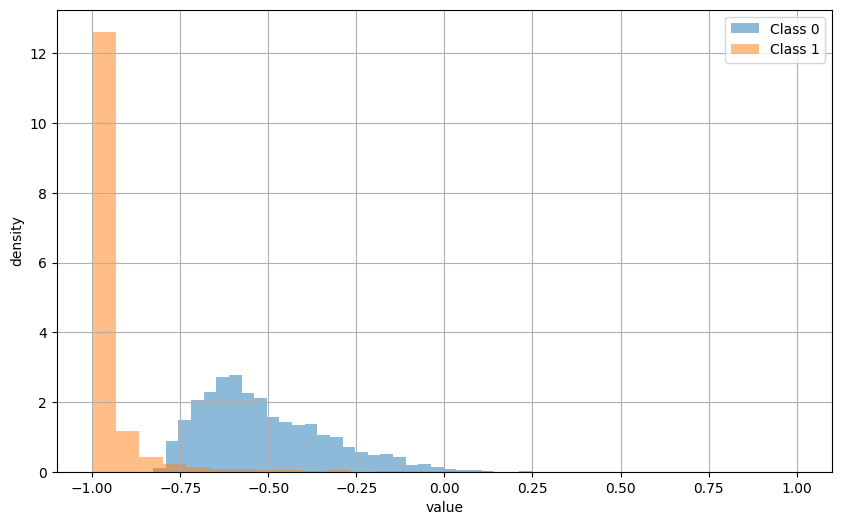

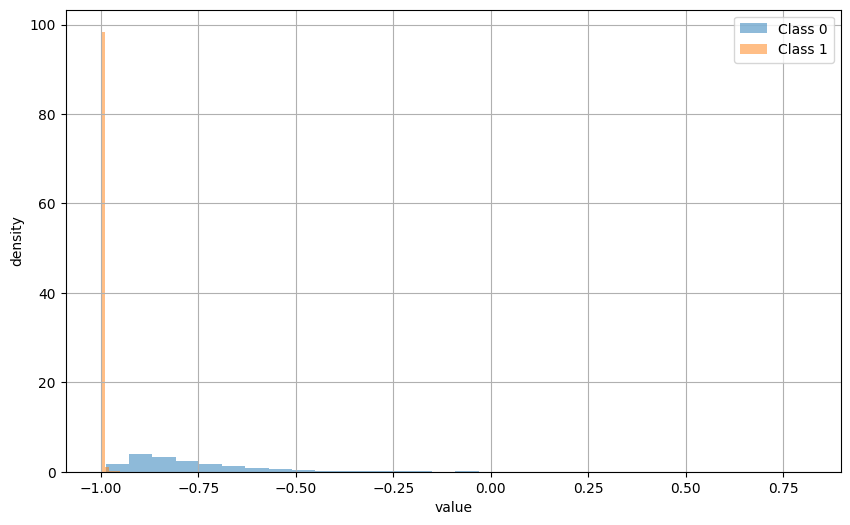

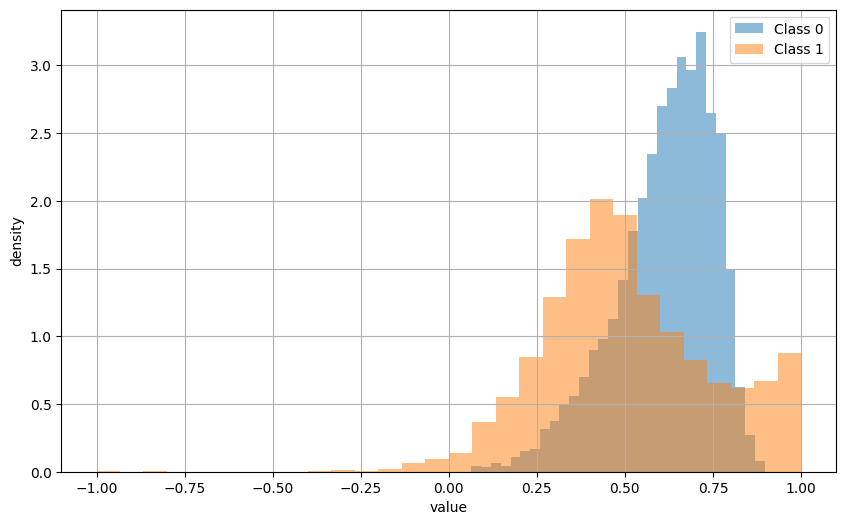

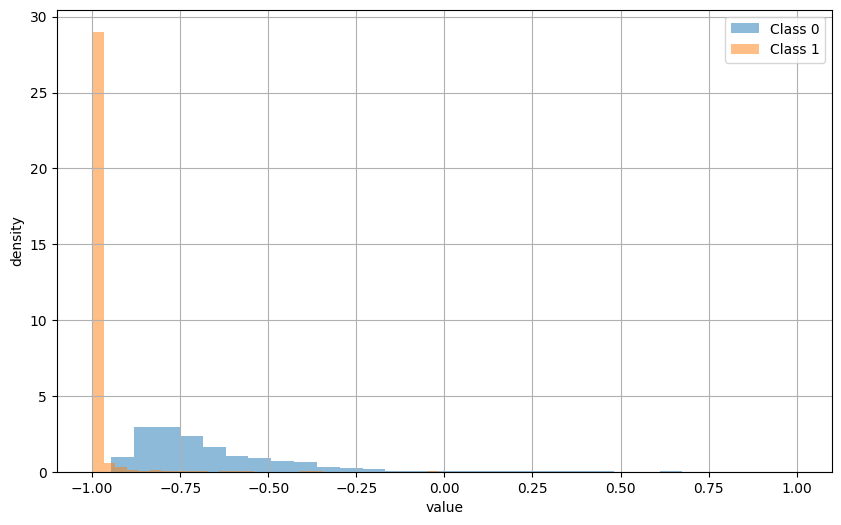

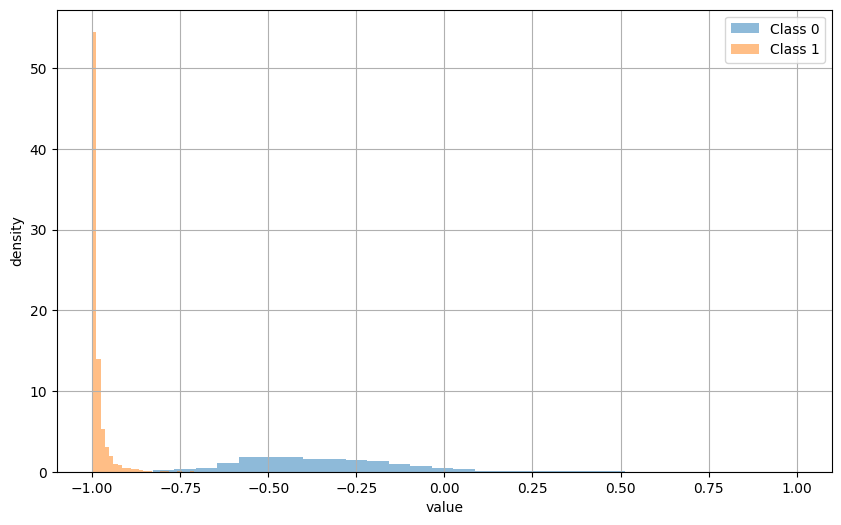

In [29]:
for feature in features_to_plot:
    plt.figure(figsize=(10,6))
    for label in sorted(merged_df[" "].unique()):
        merged_df[merged_df[" "] == label][feature].hist(
            bins=30, alpha=0.5, density=True, label=f"Class {label}"
        )
    plt.xlabel("value")
    plt.ylabel("density")
    plt.legend()
    plt.show()

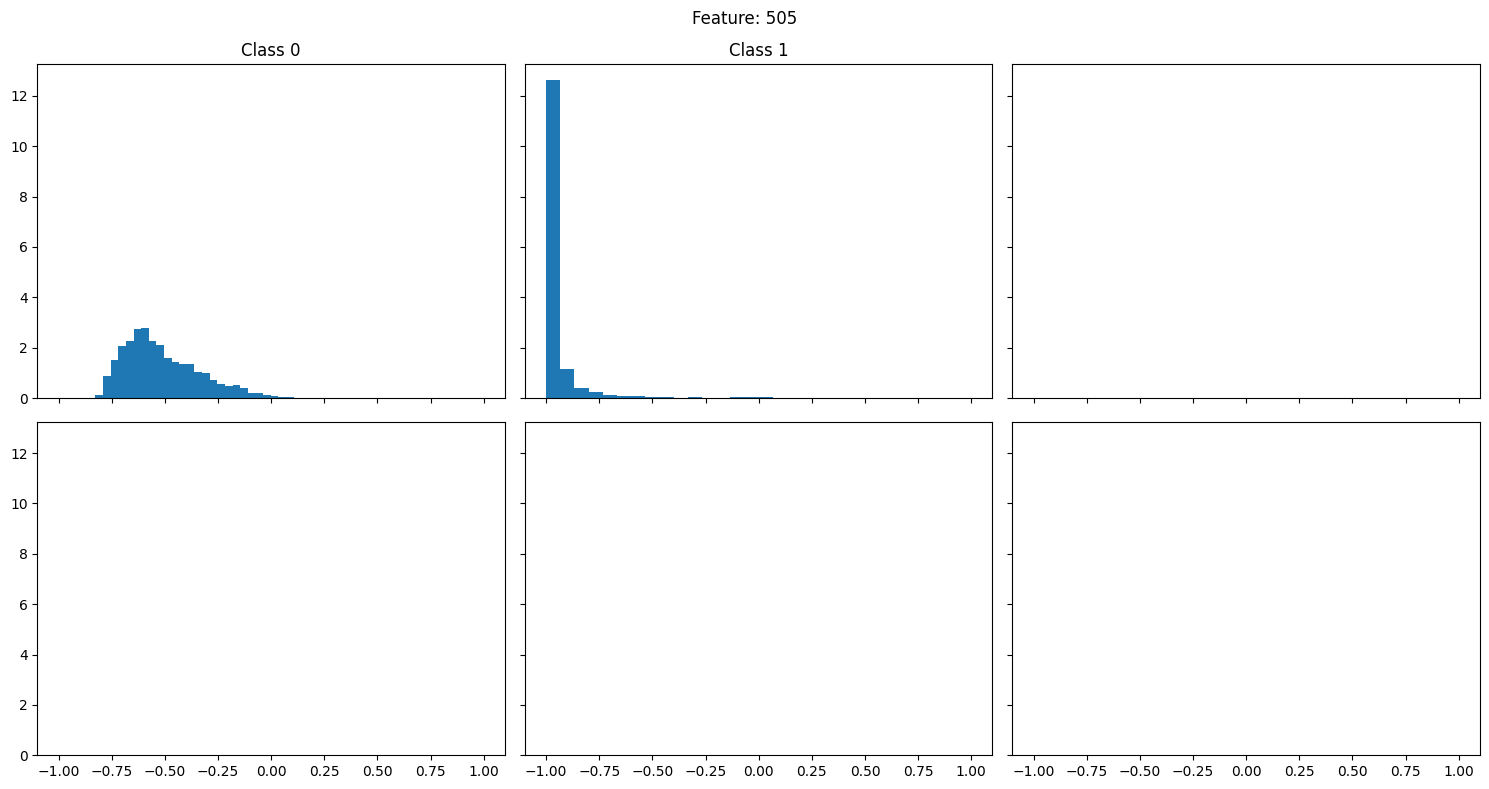

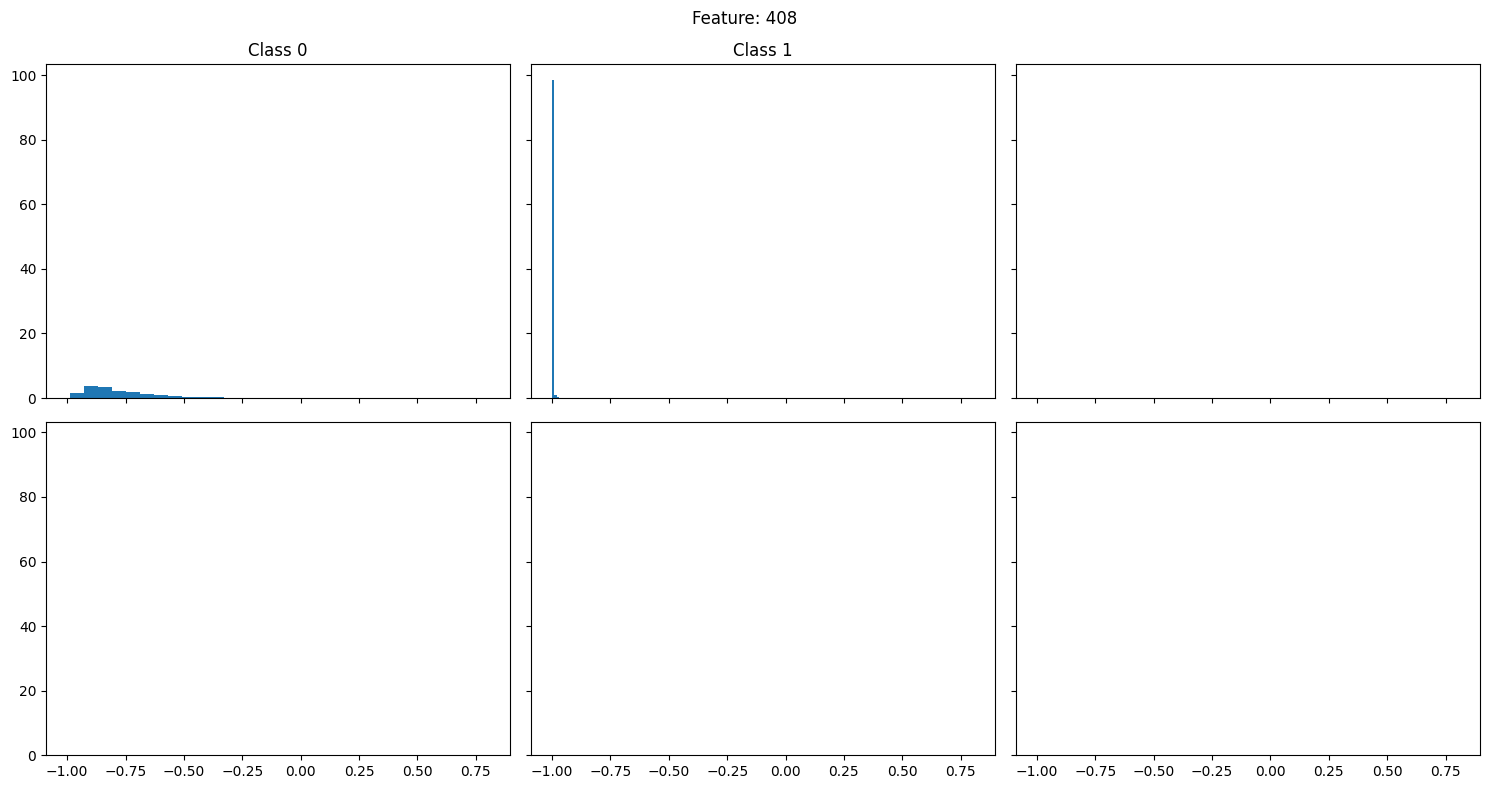

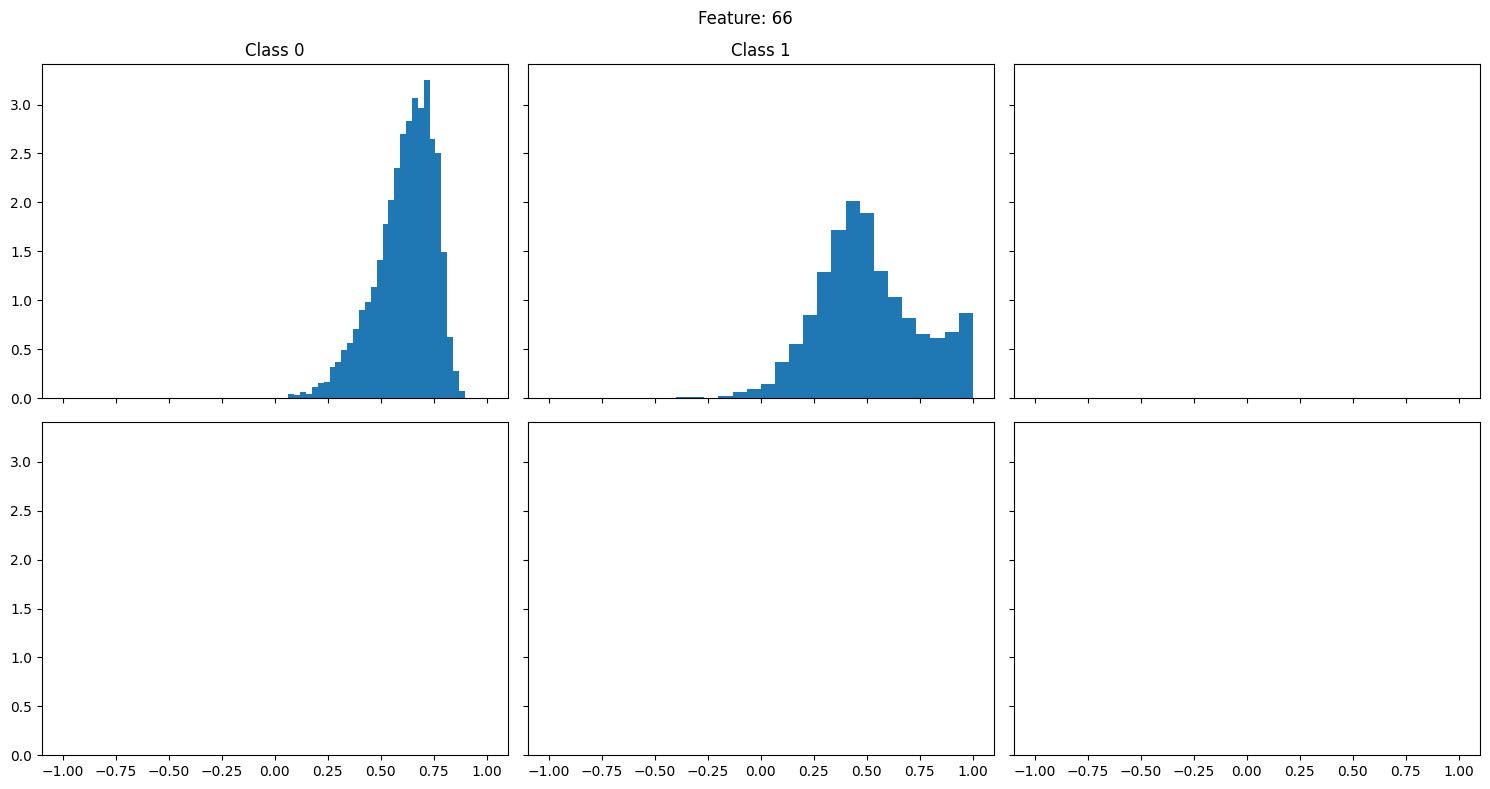

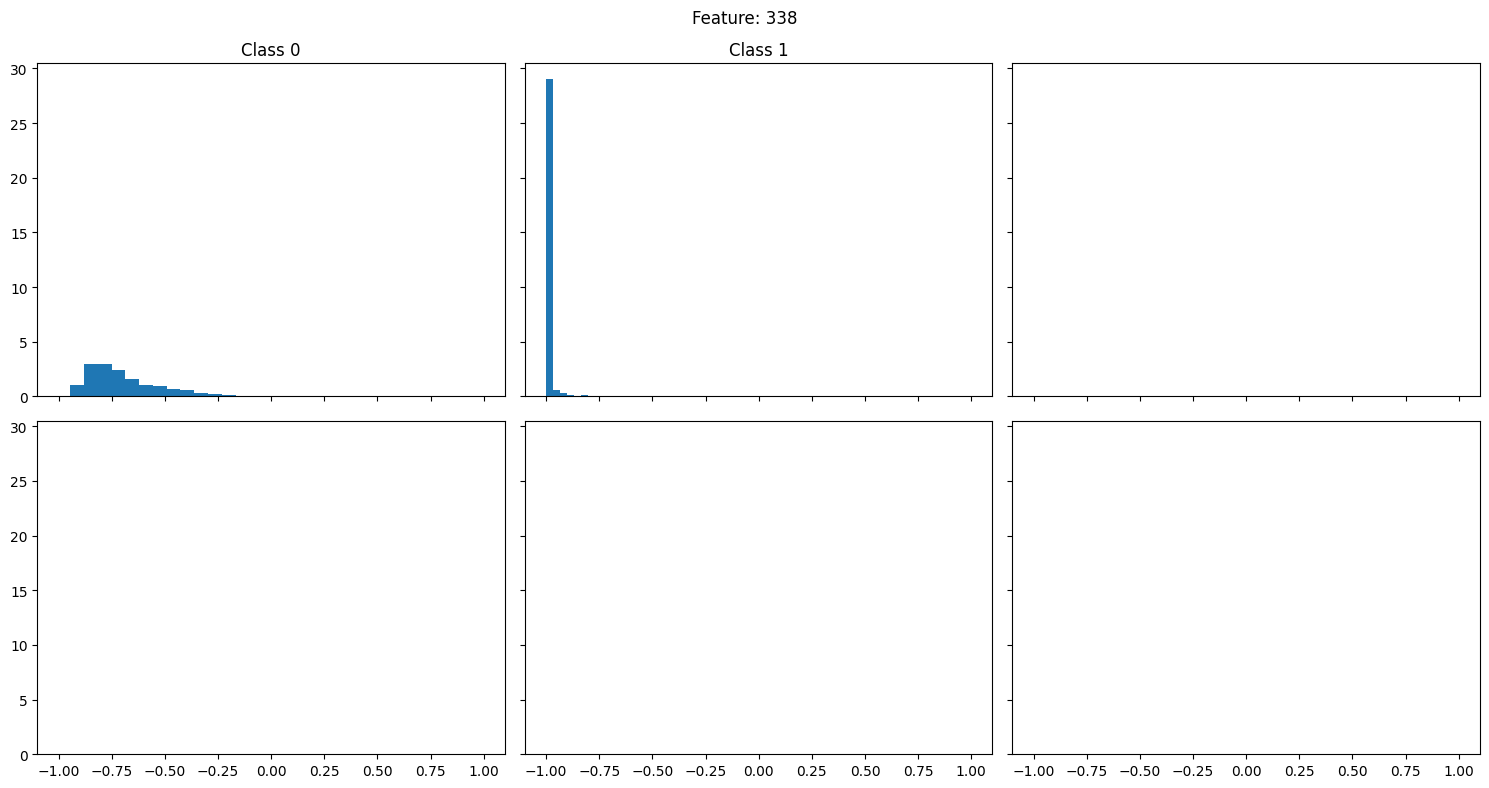

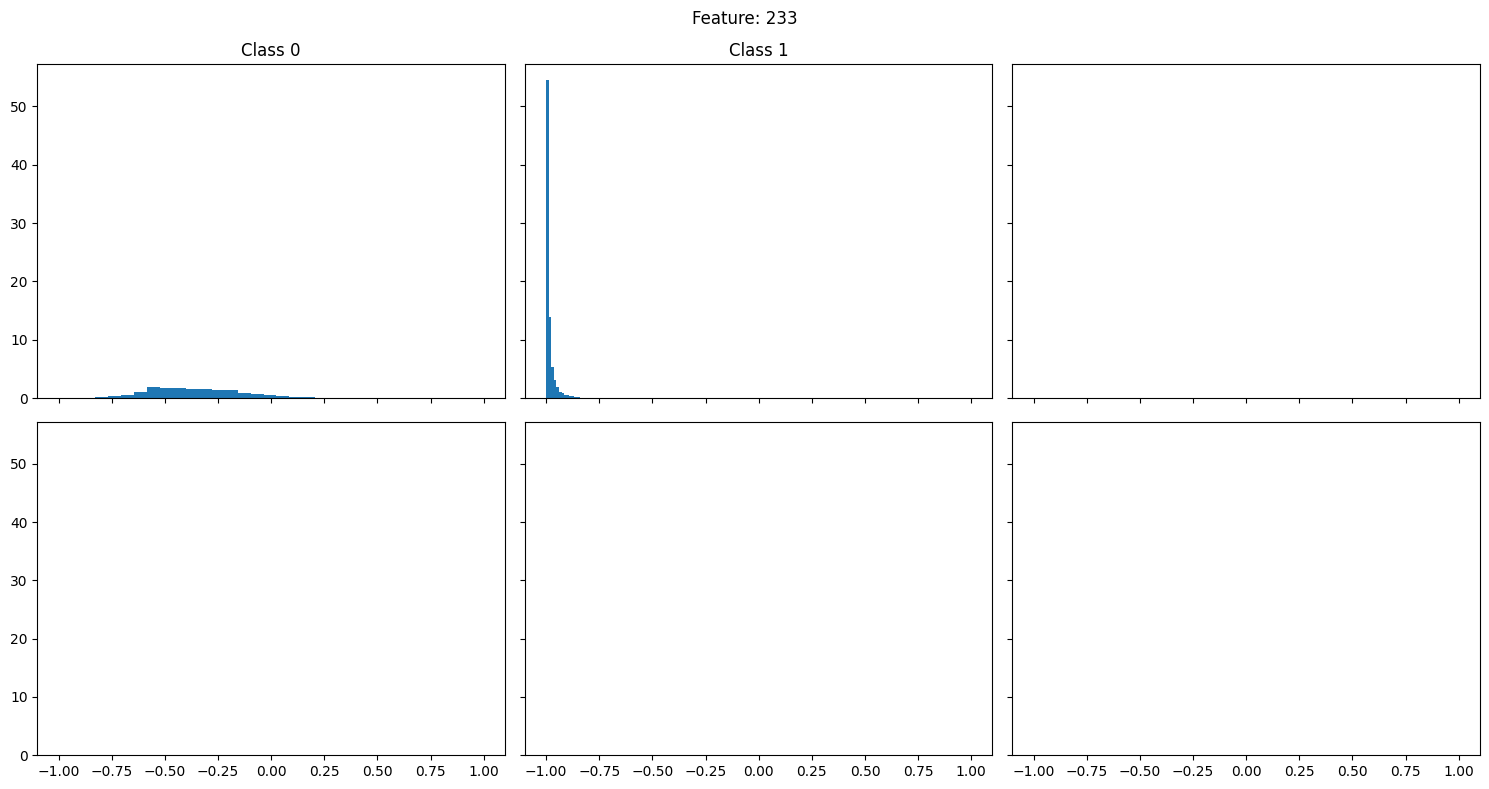

In [31]:
for feature in features_to_plot:
    fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, label in enumerate(sorted(merged_df[" "].unique())):
        axes[i].hist(
            merged_df[merged_df[" "] == label][feature],
            bins=30,
            density=True
        )
        axes[i].set_title(f"Class {label}")

    fig.suptitle(f"Feature: {feature}")
    plt.tight_layout()
    plt.show()

### Initial interpretation: GNB might not be the best generative model, as the feature distributions are clearly not Gaussian. However, GNB can still perform well as a classifier. We would keep GNB as our baseline method. 